# Chapter 2. 데이터 다루기

## 2-2 데이터 전처리

- 데이터를 사용하기 전에 데이터 전처리 과정을 거치며, 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배움

### 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data=np.column_stack((fish_length,fish_weight))

In [5]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

### 수상한 데이터

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

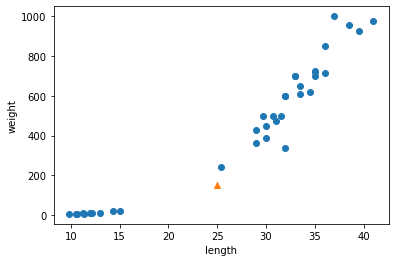

In [12]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 기준을 맞춰라

- 두 특성의 값이 놓인 범위가 다른 경우 'scale'이 다르다고도 표현함
- 따라서 특성값을 일정한 기준으로 맞춰 주어야 함.-> 이를 데이터 전처리(data preprocessing)이라 함 
- 가장 많이 사용하는 방법 standard score (표준점수) : 표준화

In [13]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [14]:
train_scaled=(train_input-mean)/std

### 전처리 데이터로 모델 훈련하기

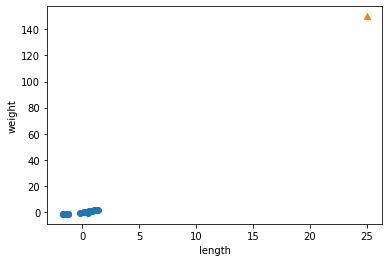

In [15]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 훈련 세트의 기준으로 테스트 세트를 변환해야 같은 스케일로 산점도를 그릴 수 있음!

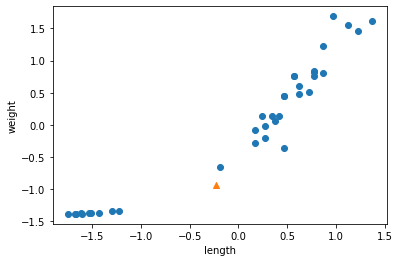

In [17]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
kn.fit(train_scaled,train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled,test_target)

1.0

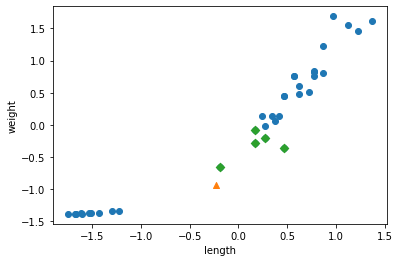

In [22]:
distances,indexes=kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 정리
- `데이터 전처리` : 머신러닝 모델에 훈련 데이터를 주입하기 전에 '가공하는 단계' 
- `표준점수` : 훈련 세트의 스케일을 바꾸는 대표적인 방법 , 훈련 세트의 평균과 표준편차로 테스트 세트를 바꿔야 함!